In [31]:
#Spark Context declaration
from pyspark.sql import SparkSession
import pyspark.sql.functions
spark = SparkSession.builder \
    .master(
        "spark://10.64.22.66:7077"
    ) \
    .appName(# Name of your application in the dashboard/UI
             "00-test-spark"
            ) \
    .config(# Tell Spark to load some extra libraries from Maven (the Java repository)
            'spark.jars.packages',
            'org.diana-hep:spark-root_2.11:0.1.13,org.diana-hep:histogrammar-sparksql_2.11:1.0.4',
            ) \
    .config('spark.cores.max',3
            ) \
    .getOrCreate()

In [32]:
# Read the ROOT file into a Spark DataFrame...
#reading it from hdfs
df = spark.read.format("org.dianahep.sparkroot").load("hdfs:///user/shoh/SingleMuonRun2016H-03Feb2017_ver2-v1_NANO.root")
# ... and print the number of events
print df.count()

403819


In [50]:
Event1 = df.select("nMuon","Muon_pt")
Event1 = Event1.filter(Event1.nMuon==0)
Event1.show()


+-----+-------+
|nMuon|Muon_pt|
+-----+-------+
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
|    0|     []|
+-----+-------+
only showing top 20 rows



In [73]:
#select 1D variable
#Event1 = df.select("RawMET_pt","Electron_pt","nElectron")
#Event1.show()

+---------+--------------------+---------+
|RawMET_pt|         Electron_pt|nElectron|
+---------+--------------------+---------+
|  54.1875|                  []|        0|
| 20.71875|[7.1949716, 6.003...|        2|
| 40.03125|          [87.34831]|        1|
| 53.21875|                  []|        0|
|  45.6875|                  []|        0|
|  48.4375|                  []|        0|
| 21.21875|         [5.2930517]|        1|
|21.203125|                  []|        0|
|  37.0625|                  []|        0|
|  32.5625|                  []|        0|
|29.140625|         [5.5248322]|        1|
|  23.0625|                  []|        0|
|29.546875|                  []|        0|
| 39.78125|[12.874033, 6.622...|        2|
| 39.34375|                  []|        0|
|  16.8125|                  []|        0|
|    144.5|[54.138454, 21.3796]|        2|
| 25.46875|                  []|        0|
|  82.4375|                  []|        0|
|26.171875|                  []|        0|
+---------+

In [74]:
Event1.filter(Event1.RawMET_pt>=50).filter(Event1.nElectron==1).filter(Event1.Electron_pt[0]>=30).show(1, truncate=False)

+---------+-----------+---------+
|RawMET_pt|Electron_pt|nElectron|
+---------+-----------+---------+
|129.75   |[220.92943]|1        |
+---------+-----------+---------+
only showing top 1 row



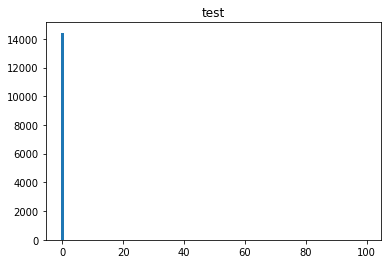

In [53]:
#from histogrammar import *
#import histogrammar.sparksql
histogrammar.sparksql.addMethods(Event1)

#hist = df.Bin(100, 0, 100, Event1['RawMET_pt'])
hist = Event1.Bin(100, 0, 100, Event1.Muon_pt[0])
#df.UntypedLabel(h1=Bin(...), h2=Bin(...))
#df.Fraction(Bin(...))
%matplotlib inline
hist.plot.matplotlib(name="test")

Welcome to JupyROOT 6.08/00
